<a href="https://colab.research.google.com/github/NataliaMak20/ai-ml-principles-exercises/blob/main/deeplake_test_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install deeplake

import sklearn
import numpy as np
import deeplake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 390 kB 3.9 MB/s 
     |████████████████████████████████| 132 kB 43.2 MB/s 
     |████████████████████████████████| 79 kB 2.9 MB/s 
     |████████████████████████████████| 6.7 MB 3.9 MB/s 
     |████████████████████████████████| 79 kB 2.3 MB/s 
     |████████████████████████████████| 10.2 MB 31.5 MB/s 
     |████████████████████████████████| 140 kB 50.6 MB/s 
     |████████████████████████████████| 132 kB 53.5 MB/s 
     |████████████████████████████████| 52 kB 666 kB/s 
     |████████████████████████████████| 127 kB 41.0 MB/s 
  Created wheel for deeplake: filename=deeplake-3.1.2-py3-none-any.whl size=469120 sha256=2691972cf8859735ff332b474afa8cf31d8f74e52fd2347ea7ca4394eeaf02e7
  Stored in directory: /root/.cache/pip/wheels/5a/68/44/50cf3e52daf85619d0b3af63d6ae8edfab889f29b1a3a4c265
Successfully built deeplake
  Attempting uninstall: urllib3
    Fo

In [2]:
ds_train = deeplake.load("hub://activeloop/mnist-train")
ds_test = deeplake.load("hub://activeloop/mnist-test")

hub://activeloop/mnist-train loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/mnist-train
hub://activeloop/mnist-test loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/mnist-test


In [3]:
len(ds_train), len(ds_test)

(60000, 10000)

In [4]:
np.max(ds_test.images)

255

In [5]:
ds_test.images[0].dtype

dtype('uint8')

In [6]:
ds_test.images.shape

(10000, 28, 28)

In [11]:
ds_train.images.numpy().reshape((len(ds_train), -1)).shape

(60000, 784)

In [13]:
X_train = ds_train.images.numpy().reshape((len(ds_train), -1))
X_test = ds_test.images.numpy().reshape((len(ds_test), -1))

In [25]:
y_train = ds_train.labels.numpy().flatten()
y_test = ds_test.labels.numpy().flatten()

In [26]:
X_train.shape

(60000, 784)

In [27]:
X_test.shape

(10000, 784)

In [28]:
import numpy as np

train_idx = np.random.choice(len(y_train), replace=False, size = 1_0000) 

6


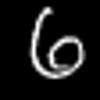

In [29]:
from PIL import Image

print(y_test[100])
Image.fromarray(X_test[100].reshape((28,28)), "L").resize((100,100))

In [30]:
from sklearn import svm 

In [31]:
model = svm.SVC()
model.fit(X_train[train_idx], y_train[train_idx])

SVC()

In [32]:
model.predict(X_test[0:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint32)

In [33]:
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint32)

In [34]:
model.predict(X_test[0:10]) == y_test[0:10]

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True])

In [36]:
from sklearn import metrics

predicted = model.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.95      0.96      0.96      1032
           3       0.96      0.95      0.96      1010
           4       0.95      0.97      0.96       982
           5       0.95      0.96      0.96       892
           6       0.97      0.97      0.97       958
           7       0.96      0.94      0.95      1028
           8       0.96      0.94      0.95       974
           9       0.95      0.94      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



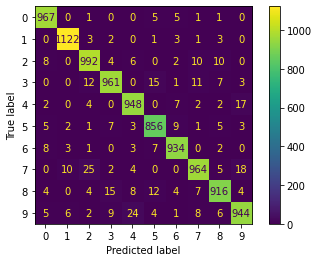

In [37]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)